In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [12]:
# But since you’re in a notebook:
root_dir = os.getcwd()

# Build the path dynamically
file_path = os.path.join(root_dir, 'data', 'spam.tsv')
if not os.path.exists(file_path):
    file_path = os.path.join(os.path.dirname(root_dir), 'data', 'spam.tsv')

df = pd.read_csv(file_path, sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [14]:
df.shape

(5572, 4)

In [15]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [24]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [25]:
df['label'].value_counts()/df.shape[0]*100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

# Balance Dataset

In [30]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [33]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [34]:
ham = ham.sample(spam.shape[0])

In [35]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [38]:
data = pd.concat([ham, spam], ignore_index=True)
data

,label,message,length,punct
0,ham,You still around? Looking to pick up later,42,1
1,ham,You need to get up. Now.,24,2
2,ham,Fun fact: although you would think armand woul...,157,2
3,ham,I am taking you for italian food. How about a ...,78,4
4,ham,I'm in town now so i'll jus take mrt down later.,48,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [40]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,label,message,length,punct
0,spam,WIN URGENT! Your mobile number has been awarde...,146,2
1,ham,S but mostly not like that.,27,1
2,spam,SplashMobile: Choose from 1000s of gr8 tones e...,155,4
3,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,136,5
4,ham,Dear we got &lt;#&gt; dollars hi hi,37,5
...,...,...,...,...
1489,spam,Fantasy Football is back on your TV. Go to Sky...,161,4
1490,spam,URGENT! We are trying to contact U. Todays dra...,159,5
1491,spam,Call FREEPHONE 0800 542 0578 now!,33,1
1492,spam,Babe: U want me dont u baby! Im nasty and have...,152,7


# EDA

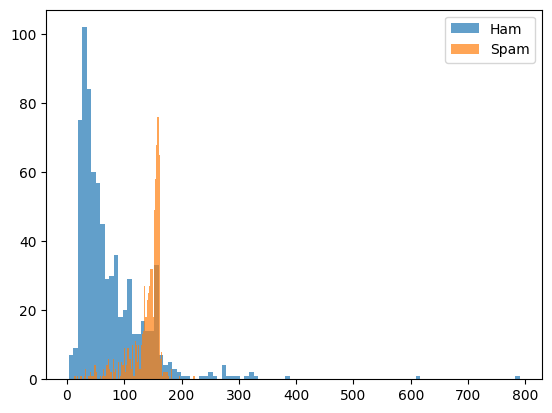

In [43]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='Ham')
plt.hist(spam['length'], bins=100, alpha=0.7, label='Spam')
plt.legend()
plt.show()

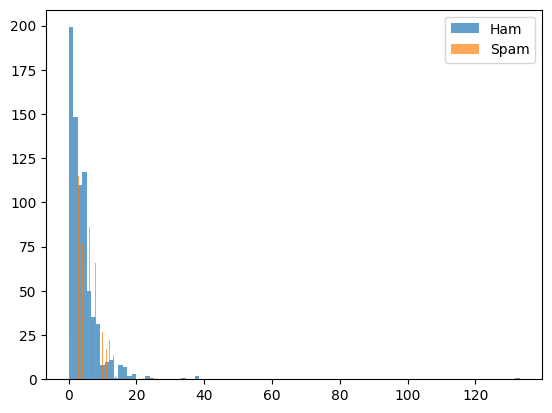

In [44]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='Ham')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='Spam')
plt.legend()
plt.show()

# Data Preperation

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack, csr_matrix

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# X_text = data['message'].astype(str)
# X_num = data[['length','punct']]
# y = (data['label'] == 'spam').astype(int)

In [ ]:
# X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(X_text, X_num, y, test_size=0.2, random_state=42, stratify=y)

In [116]:
tfidf = TfidfVectorizer(
    ngram_range=(1,3),
    stop_words='english',
    min_df=2,
)

In [117]:
X = data['message'].astype(str)
y = (data['label'] == 'spam').astype(int)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [107]:
# X_train_tfidf = tfidf.fit_transform(X_text_train)
# X_test_tfidf  = tfidf.transform(X_text_test)

# X_train_final = hstack([X_train_tfidf, csr_matrix(X_num_train.values)])
# X_test_final  = hstack([X_test_tfidf,  csr_matrix(X_num_test.values)])

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}")
print(f"Confusion Matrix :\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9632107023411371
Confusion Matrix :
[[145   5]
 [  6 143]]
Confusion Matrix :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       150
           1       0.97      0.96      0.96       149

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [121]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}")
print(f"Confusion Matrix :\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9565217391304348
Confusion Matrix :
[[149   1]
 [ 12 137]]
Confusion Matrix :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       150
           1       0.99      0.92      0.95       149

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [122]:
svm = SVC(C=100000, gamma='auto')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}")
print(f"Confusion Matrix :\n{classification_report(y_test, y_pred)}")

Accuracy: 0.959866220735786
Confusion Matrix :
[[146   4]
 [  8 141]]
Confusion Matrix :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.97      0.95      0.96       149

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [90]:
svm

,C,100000
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [126]:
def predict(X):
    X  = tfidf.transform([X])
    X = X.toarray()
    pred = logr.predict(X)
    label_map = {0: 'ham', 1: 'spam'}
    return label_map[pred[0]]

In [127]:
predict('Hey, wassup my man?')

'ham'

In [128]:
predict('Hello. Hurry! You have won a lottrey of 1 million dollars')

'spam'